### Lab 08
#### Problem: Grid World
##### Members:
        1. Amit Vikram Singh(111601001)
        2. Kuldeep Singh Bhandari(111601009)
Logic :

> 1. **Value Iteration** : In value iteration, first we find optimal value for the given grid world and then find the optimal policy. 
2. **Policy Iteration** : In policy iteration, we have an initial pseudo policy and using that, we will find value corresponding to that policy and then we will update the policy in greedy fashion. We keep on doing that until current policy becomes equal to the previous policy.

### Initializing environment

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

class State:
    def __init__(self, i, j):
        self.row = i
        self.col = j

    
class Environment:
    def __init__(self, n, m):
        self.rowNum = n
        self.colNum = m
        
        #reward for R: S -> relaNumber
        self.reward = np.array([[0, 0.45, 1, 0.9]
                               ,[0.23, 1.25, 0, 0]
                               ,[0, 0.45, 0.75, 0]
                               ,[0.85, 1.5, 2.5, 0.85]])
        
        #Initial Policy for policy iteration  
        self.policy =  np.array([["right", "right", "right", "right"]
                                ,["right", "right", "right", "right"]
                                ,["right", "right", "right", "right"]
                                ,["right", "right", "right", "right"]])
        
        #Probabilty P(action) : A x A-> realNumber
                                    #left, right, up, down
        self.probability = np.array([[0.8, 0, 0.1, 0.1]    #left
                                    ,[0, 0.8, 0.1, 0.1]   #right
                                    ,[0.1, 0.1 , 0.8, 0]  #up
                                    ,[0.1, 0.1, 0, 0.8]])  #down
        
        #Initial Value Function
        self.value = np.zeros((self.rowNum, self.colNum))
        
        #Possible Actions
        self.action = {"left": (0, -1), "right": (0, 1), "up": (-1, 0), "down": (1, 0)}
        
    #fucntion which takes a state and checks if state if valid i.e state is not outside of grid
    def isValidState(self, state):
        return (state.row >=0 and state.row < self.rowNum and state.col < self.colNum and state.col >=0)
        
        
    #function which takes current state and action AND returns nextState
    def getNextState(self, state, action):
        nextState = copy.copy(state)
        nextState.row+=self.action[action][0]
        nextState.col+=self.action[action][1]
        
        if(self.isValidState(nextState)):
            return nextState
        
        return None
        
        
class agent:
    def __init__(self, row, col):
        self.row = row
        self.col = col

### 1. Value Iteration

In [19]:
indexToAction = {0:"left", 1:"right", 2:"up", 3:"down"}
actionToIndex = {"left":0, "right":1, "up":2, "down":3}

env = Environment(4, 4)

def normInfinity(currValue, optimalValue):
    maxDiff = 0
    for i in range(env.rowNum):
        for j in range(env.colNum):
            maxDiff = max(maxDiff, abs(currValue[i, j] - optimalValue[i, j]))
    return maxDiff
            
def valueIteration(gamma):
    print("_________________Value Iteration_________________")
    iter1 = 0
    theta = 0.01
    diff = []
    while(True):
        if(iter1>1000):
            break
        iter1+=1

        delta = 0
        for row in range(env.rowNum):
            for col in range(env.colNum):
                currState = State(row, col)
                value = -100
                prevValue = env.value[row, col]
                for action in env.action:
                    currReward = 0
                    for i, p in enumerate(env.probability[actionToIndex[action]]):
                        succAction = indexToAction[i]
                        nextState = env.getNextState(currState, succAction)
                        if(nextState is None):
                            currReward+=(p*-1)
                        else:
                            currReward+=(p*(env.reward[currState.row, currState.col]
                                            + gamma* env.value[nextState.row, nextState.col]))

    #                 print(currState.row, currState.col, currReward)
                    value = max(value, currReward)

                env.value[row, col] = value
                delta = max(delta, abs(prevValue - env.value[row, col]))
    #     print(delta)
        if(delta < theta):
            print("Values converged....")
            break
            
    #get Optimal Policy
    for row in range(env.rowNum):
        for col in range(env.colNum):
            currState = State(row, col)
            maxReward = -10
            optimalAction = "left"
            for action in env.action:
                currReward = 0
                for i, p in enumerate(env.probability[actionToIndex[action]]):
                    succAction = indexToAction[i]
                    nextState = env.getNextState(currState, succAction)
                    if(nextState is None):
                        currReward+=(p*-1)
                    else:
                        currReward+=(p*(env.reward[currState.row, currState.col]
                                        + gamma* env.value[nextState.row, nextState.col]))
                if(currReward > maxReward):
                    maxReward = currReward
                    optimalAction = action
            env.policy[currState.row, currState.col] = optimalAction
                

    print("Reward\n", env.reward)
    print("Optimal Values\n",env.value)
    print("Optimal Policy\n", env.policy)
    
    #Plot ||V_t - V_inf||_inf
    optimalValue = env.value.copy()
    env.value = np.zeros((env.rowNum, env.colNum))
    iter1 = 0
    diff = []
    while(True):
        if(iter1>1000):
            break
        iter1+=1

        delta = 0
        for row in range(env.rowNum):
            for col in range(env.colNum):
                currState = State(row, col)
                value = -1
                prevValue = env.value[row, col]
                for action in env.action:
                    currReward = 0
                    for i, p in enumerate(env.probability[actionToIndex[action]]):
                        succAction = indexToAction[i]
                        nextState = env.getNextState(currState, succAction)
                        if(nextState is None):
                            currReward+=(p*-1)
                        else:
                            currReward+=(p*(env.reward[currState.row, currState.col]
                                            + gamma* env.value[nextState.row, nextState.col]))

                    value = max(value, currReward)

                env.value[row, col] = value
                delta = max(delta, abs(prevValue - env.value[row, col]))
        if(delta < theta):
            break
        diff.append(normInfinity(env.value, optimalValue))
    print("Plot of infinity norm of V_t - V*")
    plt.plot(diff, 'r-', label = "V-V*")
    plt.xlabel("Iteration")
    plt.ylabel("Infinite norm")
    plt.title("|| V_t - V* ||_inf  vs  iteration\n")
    plt.legend()
    plt.show()
    print("_______________Value Iteration Completed_________________")

### Policy Iteration

In [20]:
def getPolicy(env, policy, gamma):
    value = np.zeros((env.rowNum, env.colNum))
    
    iter1 = 0
    theta = 0.01
    while(True):
        if(iter1 > 1000):
            break
        iter1+=1
        delta = 0
        for row in range(env.rowNum):
            for col in range(env.colNum):
                prevVal = value[row, col]
                currState = State(row, col)
                action = policy[row, col]
                
                currReward = 0
                for i, p in enumerate(env.probability[actionToIndex[action]]):
                    succAction = indexToAction[i]
                    nextState = env.getNextState(currState, succAction)
                    if(nextState is None):
                        currReward+=(p*-1)
                    else:
                        currReward+=(p*(env.reward[currState.row, currState.col]
                                         + gamma* value[nextState.row, nextState.col])) 
                    
                value[row, col] = currReward
                delta = max(delta, abs(value[row, col] - prevVal))
        if(delta < theta):
            break
    
    policy = np.array([["right", "right", "right", "right"]
                        ,["right", "right", "right", "right"]
                        ,["right", "right", "right", "right"]
                        ,["right", "right", "right", "right"]])
    
    for row in range(env.rowNum):
        for col in range(env.colNum):
            currState = State(row, col)
            optimalAction = "left"
            maxReward = -100
            for action in env.action:
                currReward = 0
                for i, p in enumerate(env.probability[actionToIndex[action]]):
                    succAction = indexToAction[i]
                    nextState = env.getNextState(currState, succAction)
                    if(nextState is None):
                        currReward+=(p*-1)
                    else:
                        currReward+=p*(env.reward[currState.row, currState.col] + 
                                       gamma*value[nextState.row, nextState.col])
                if(currReward > maxReward):
                    maxReward = currReward
                    optimalAction = action
            
            policy[row, col] = optimalAction
            
    return policy

def getValue(env, policy, gamma):
    value = np.zeros((env.rowNum, env.colNum))
    iter1 = 0
    theta = 0.01
    while(True):
        if(iter1 > 1000):
            break
        iter1+=1
        for row in range(env.rowNum):
            for col in range(env.colNum):
                currState = State(row, col)
                action = policy[row, col]
                
                currReward = 0
                for i, p in enumerate(env.probability[actionToIndex[action]]):
                    succAction = indexToAction[i]
                    nextState = env.getNextState(currState, succAction)
                    if(nextState is None):
                        currReward+=(p*-1)
                    else:
                        currReward+=(p*(env.reward[currState.row, currState.col]
                                         + gamma* value[nextState.row, nextState.col])) 
                    
                value[row, col] = currReward
    return value

In [21]:
def policyIteration(gamma):
    print("\n___________________Policy Iteration_____________________")
    env = Environment(4, 4)
    policy = np.array([["right", "right", "right", "right"]
                        ,["right", "right", "right", "right"]
                        ,["right", "right", "right", "right"]
                        ,["right", "right", "right", "right"]])
    
    for iter1 in (range(1000)):

        prevPolicy = policy.copy()
        policy = getPolicy(env, policy, gamma)
        if(np.array_equal(policy, prevPolicy)):
            print("Found optimal Policy")
            break
        
    print("Optimal Policy\n", policy)
    print("Optimal Value\n", getValue(env, policy, gamma))
    print("_________________Policy Iteration Completed________________")

---
#### Call Functions here 

_________________Value Iteration_________________
Values converged....
Reward
 [[ 0.    0.45  1.    0.9 ]
 [ 0.23  1.25  0.    0.  ]
 [ 0.    0.45  0.75  0.  ]
 [ 0.85  1.5   2.5   0.85]]
Optimal Values
 [[ 46.03395074  52.34419562  52.49800915  46.92001947]
 [ 52.08771757  53.88571005  53.28842852  51.5556399 ]
 [ 52.12578348  53.9757024   54.7997919   52.85915652]
 [ 48.08416014  53.97680125  55.59643034  49.43279872]]
Optimal Policy
 [['right' 'down' 'down' 'left']
 ['right' 'down' 'down' 'left']
 ['right' 'right' 'down' 'left']
 ['right' 'up' 'up' 'left']]
Plot of infinity norm of V_t - V*


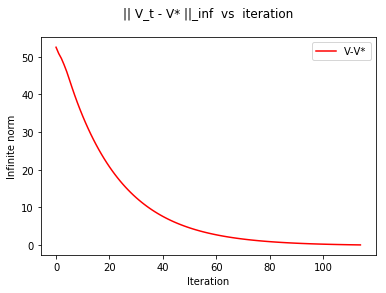

_______________Value Iteration Completed_________________

___________________Policy Iteration_____________________
Found optimal Policy
Optimal Policy
 [['right' 'down' 'down' 'left']
 ['right' 'down' 'down' 'left']
 ['right' 'right' 'down' 'left']
 ['right' 'up' 'up' 'left']]
Optimal Value
 [[ 46.20959513  52.53370762  52.68223783  47.08249321]
 [ 52.27722813  54.07182142  53.46919662  51.73080361]
 [ 52.30999811  54.15646912  54.97517776  53.02927681]
 [ 48.24650986  54.15195159  55.76654931  49.58284379]]
_________________Policy Iteration Completed________________


In [23]:
valueIteration(gamma = 0.98)
policyIteration(gamma = 0.98)